In [1]:
%cd ..

C:\Users\georg\Documents\msc-project


In [2]:
import numpy as np
import pandas as pd

from src.evaluation import evaluate_model, compare_classification_models
from src.optimization import optimize_random_forest
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [3]:
df = pd.read_csv("data/interim/tracks.csv")

In [11]:
popularity_bins = [0,5e+04,1e+06,1e+09]
features = [
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'time_signature',
    'duration_ms'
]

data = df.loc[:,features]
views = df['views']
targets = views[views > 0].apply(np.digitize,bins=popularity_bins)

nrm = MinMaxScaler()
regularized = nrm.fit_transform(data[views > 0])
X, y = regularized, targets

<AxesSubplot:>

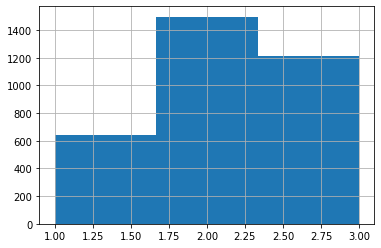

In [12]:
y.hist(bins=3)

In [13]:
compare_classification_models(X,y)

Classifier                Pr   Re   Ac  
Baseline                  0.34 0.34 0.37
Decision Tree             0.34 0.34 0.37
Random Forest             0.34 0.35 0.43


c:\users\georg\documents\msc-project\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\georg\documents\msc-project\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\georg\documents\msc-project\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\georg\documents\msc-project\venv\l

SVC                       0.28 0.34 0.44
Logistic Regression       0.27 0.33 0.44
Complement Naive Bayes    0.34 0.34 0.3 


c:\users\georg\documents\msc-project\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\georg\documents\msc-project\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\georg\documents\msc-project\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
model = optimize_random_forest(X,y,measure='f1_macro')

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [9]:
model.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_features': 'auto',
 'n_estimators': 100}

In [10]:
evaluate_model(model.best_estimator_,X,y)

[0.3425807410208919, 0.3489956736189, 0.42737727161509886]